In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18.0, 7.0)

In [2]:
def plotter (x,y):
    a_plot = x['revenue'].hist(bins=20)
    a_plot.get_xaxis().get_major_formatter().set_scientific(False)
    a_plot.set_xlabel('Revenue (M)')
    ticks = a_plot.get_xticks()/1000000
    a_plot.set_xticklabels(ticks)
    a_plot.set_ylabel('No. of Companies')
#    print (y + ' , Revenue Distribution')
    a_plot.set_title(y + ' , Revenue Distribution')

In [3]:
glob.glob('./data/*.csv')

['./data/2013_inc5k.csv',
 './data/2014_inc5k.csv',
 './data/2015_inc5k.csv',
 './data/2016_inc5k.csv',
 './data/agencies_hr_2016.csv',
 './data/hr-ratio.csv']

In [4]:
df16 = pd.read_csv('./data/2016_inc5k.csv')

- - -
## Create Headcount Ratio
Alexei says:

> In the area that we are working on the average revenue is about $120K — $180K equals one employee.

> Put another way as well you know that for the business to make 20% EBIT we have to be able to charged their people at about 2.6 to their cost. Or have a margin of about 60%

* If we have 20 employees (E), we can expect a revenue of $2.4M — $3.6M (REV), with the headcount ratio (HR) equal to 120k to 180k
    + E x HR = REV 
    + HR = REV / E
    + 120000 = 2400000 / 20

So we just need to divide the revenue by the employees to see what the headcount ratio is. Let's add that to the dataframe as a new column. Then we can slice and dice by type of company.

In [5]:
df16['hr-ratio'] = df16['revenue'] / df16['workers']
df16

,Unnamed: 0,city,state_l,metro,revenue,url,industry,workers,rank,id,yrs_on_list,growth,ifmid,ifiid,state_s,company,hr-ratio
0,0,Los Angeles,California,Los Angeles,116247698,loot-crate,Consumer Products & Services,218,1,42940,1,66788.5962,2,4,CA,Loot Crate,5.332463e+05
1,1,Somerville,Massachusetts,Boston,55018793,paint-nite,Consumer Products & Services,100,2,42941,1,36555.2472,6,4,MA,Paint Nite,5.501879e+05
2,2,Visalia,California,"Visalia-Porterville, CA",33507450,calcom-solar,Energy,47,3,42942,1,31633.5448,172,16,CA,CalCom Solar,7.129245e+05
3,3,Evansville,Indiana,"Evansville, IN-KY",30695215,eluxurysupplycom,Retail,82,4,36643,2,23619.7198,641,18,IN,eLuxurySupply.com,3.743319e+05
4,4,Atlanta,Georgia,Atlanta,33370967,companycom,Business Products & Services,48,5,36639,2,23486.8894,29,17,GA,Company.com,6.952285e+05
5,5,Cambridge,Massachusetts,Boston,17743829,globalization-partners,Business Products & Services,15,6,42943,1,16196.5338,6,17,MA,Globalization Partners,1.182922e+06
6,6,New York,New York,New York City,15733570,bounce-exchange,Software,130,7,42944,1,14574.6474,9,9,NY,Bounce Exchange,1.210275e+05
7,7,Santa Monica,California,Los Angeles,15598837,los-york,Advertising & Marketing,25,8,42945,1,14404.6093,2,5,CA,Los York,6.239535e+05
8,8,Pittsburgh,Pennsylvania,"Pittsburgh, PA",42425003,pantherx-specialty-pharmacy,Health,39,9,42946,1,13380.8799,52,10,PA,PANTHERx Specialty Pharmacy,1.087821e+06
9,9,Leesburg,Virginia,"Washington, DC",25863238,fedbiz-it-solutions,Government Services,9,10,42947,1,12620.5845,3,7,VA,FedBiz IT Solutions,2.873693e+06


In [6]:
df16.to_csv('./data/agencies_hr_2016.csv')

In [7]:
# Starting with advertising and marketing
agencies = df16[(df16['industry'] == "Advertising & Marketing")]
agencies.shape

(484, 17)

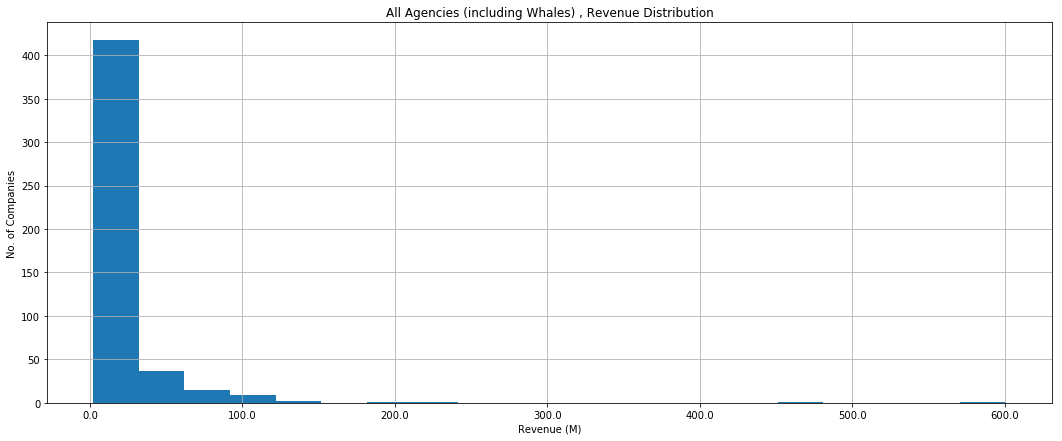

In [8]:
plotter(agencies,'All Agencies (including Whales)')

Let's bucket the agencies into 

type | description | range
---|---|---
whales | Ridiculously Unaffordable | more than 50M revenue
high | Too high | 16M to 50M revenue
affordable | GOLDILOCKS—In our range | 9M to 16M revenue
low | Not big enough | less than 9M revenue

- - - 

In [9]:
whales = agencies[agencies['revenue'].astype('int') > 50000000]
whales['hr-ratio'].describe().astype('int')

count         37
mean      664652
std       525436
min       140675
25%       293670
50%       600745
75%       804949
max      2413969
Name: hr-ratio, dtype: int64

SO...the **37** whales have an average HR ratio of

## 37 agencies; HR = $664,652 per employee?

But the max is 

### $2,413,969 

which could indicate that really these big guys are in a class of their own, that we need to focus in on our sub $20M range

- - - 

In [10]:
high = agencies[(agencies['revenue'].astype('int') < 49999999) & (agencies['revenue'].astype('int') > 16000000)]
high['hr-ratio'].describe().astype('int')

count         88
mean      382156
std       326273
min        71961
25%       183220
50%       299741
75%       486869
max      2227794
Name: hr-ratio, dtype: int64

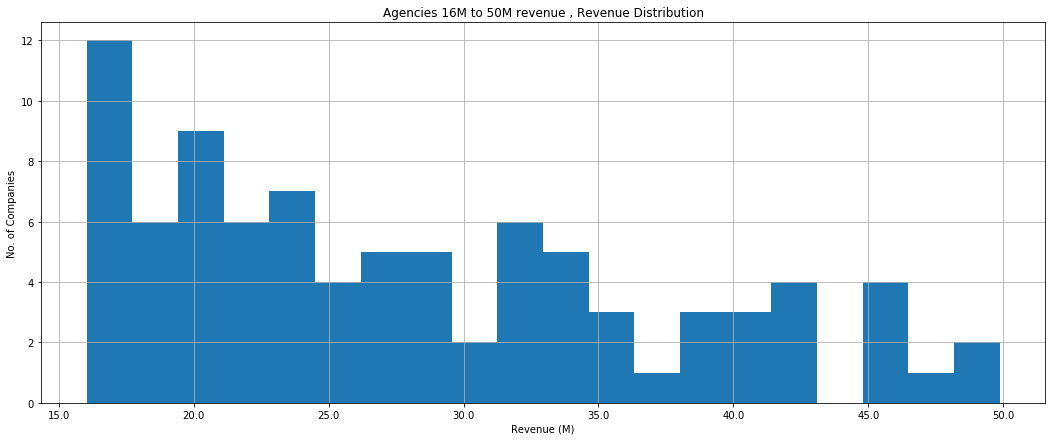

In [11]:
plotter(high,'Agencies 16M to 50M revenue')

So on the high range, a cluster (around 40) agencies in the 25M range.

> I wonder if we should cut off around $25M? But then that's a BIG acquisition for a new team


## 88 agencies, HR = $382,156 per employee?

again, a max of


### $2,227,794

May indicate that some of these need to be thrown out. 

- - -

In [12]:
affordable = agencies[(agencies['revenue'].astype('int') < 15999999) & (agencies['revenue'].astype('int') > 9000000)]
affordable['hr-ratio'].describe().astype('int')

count         81
mean      291925
std       256724
min        42211
25%       142770
50%       211331
75%       320613
max      1756069
Name: hr-ratio, dtype: int64

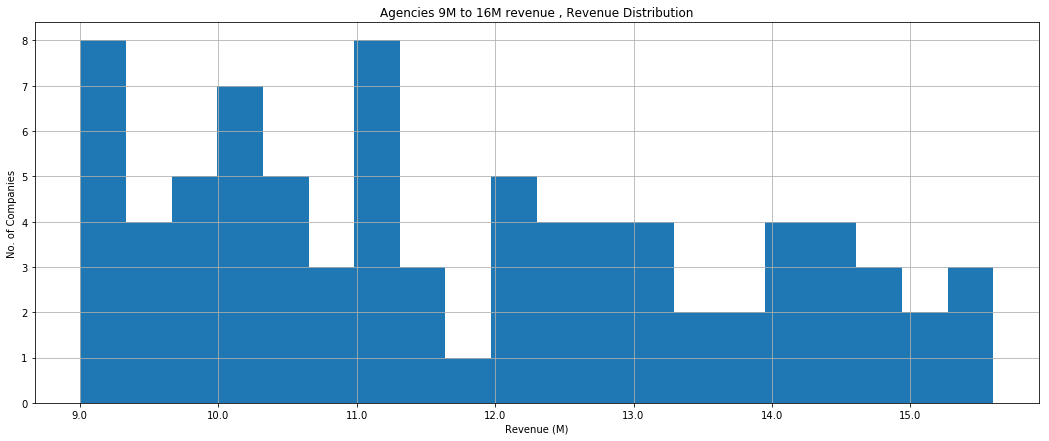

In [13]:
plotter(affordable,'Agencies 9M to 16M revenue')

So of the **81** agencies in our price high range, three clusters

* (roughly 30%) agencies 9-10M range
* (around 20%) agencies 12-13M range
* (around 20%) agencies 14M+ range

## 81 agencies; HR = $291,925

min/max = 

### $42,211 / $1,756,069

- - -

In [14]:
low = agencies[agencies['revenue'].astype('int') < 8999999]
low['hr-ratio'].describe().astype('int')

count        278
mean      251989
std       363896
min        29599
25%       112705
50%       158956
75%       247205
max      4002554
Name: hr-ratio, dtype: int64

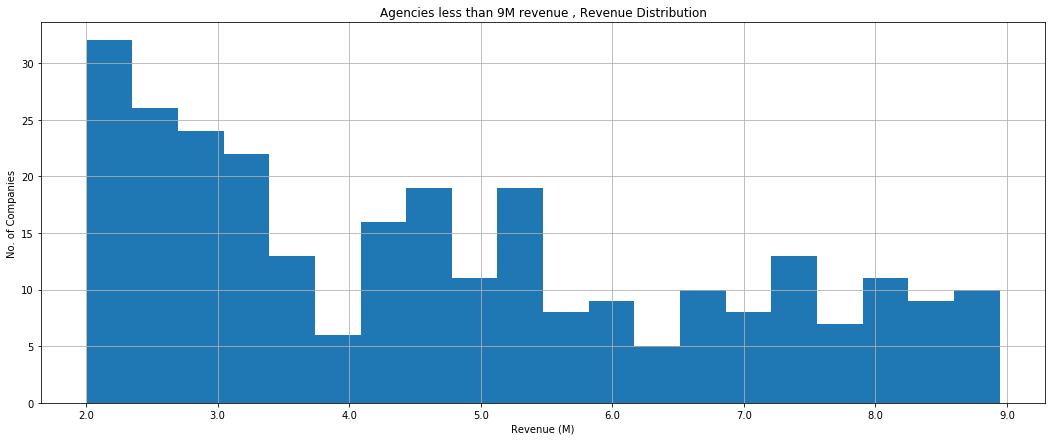

In [15]:
plotter(low,'Agencies less than 9M revenue')

## 278 agencies; HR = $251,989

min/max = 

### $29,599 / $4,002,554

Let's also see about 

Very interesting, I would say that an HR ranging around $250,000 per employee could be our 'rule of thumb'

In [16]:
coders = df16[(df16['industry'] == "Software")]
coders['revenue'].describe().astype('int')

count          332
mean      17477866
std       31690574
min        2003322
25%        4034286
50%        6785309
75%       16803165
max      358909086
Name: revenue, dtype: int64

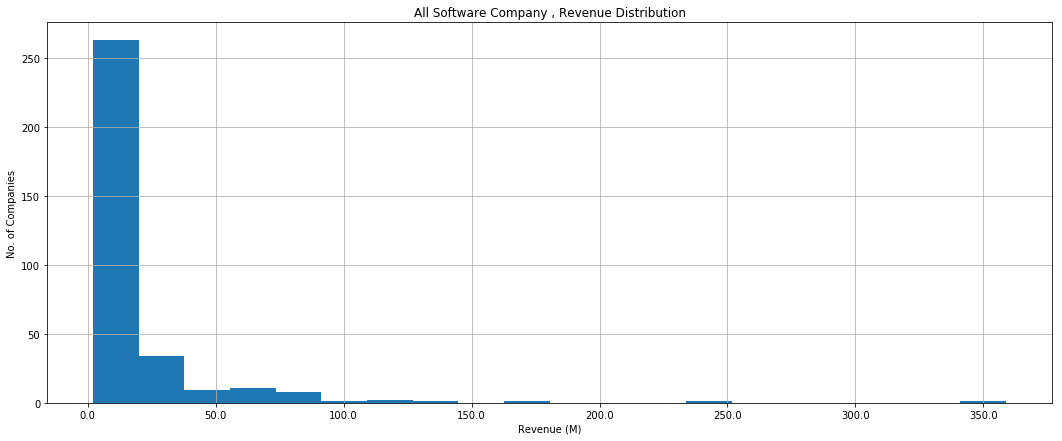

In [17]:
plotter(coders,'All Software Company')

In [18]:
# Now narrow in on the majority of the bell curve of revenue distribution
# Somewhere between 1M and 30M seems like the middle of the bell curve...seems low, but 
# I suppose that Software writers can only charge for their own time:
coders = coders[(coders['revenue'] > 999999) & (coders['revenue'].astype('int') < 30000000)]
coders['hr-ratio'].describe().astype('int')

count        287
mean      156474
std       128788
min        12042
25%        94838
50%       134342
75%       179010
max      1640134
Name: hr-ratio, dtype: int64

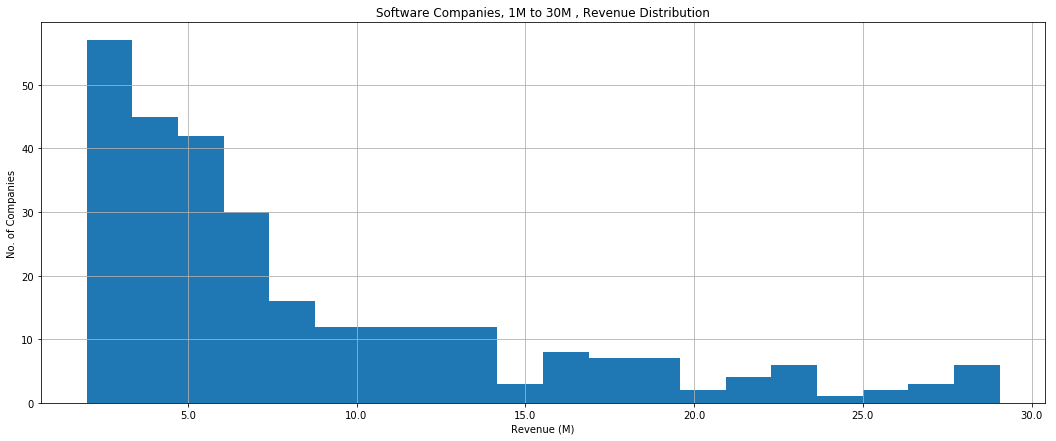

In [19]:
plotter(coders,'Software Companies, 1M to 30M')

## 297 "Software" companies; HR Ratio = 156000
#### I am fascinated that software companies have a lower HR Ratio than agencies!
#### Let's do the same for Media companies....
---

In [20]:
media = df16[(df16['industry'] == "Media")]
media['revenue'].describe().astype('int')

count           61
mean      13034526
std       17511779
min        2013000
25%        3525000
50%        8222509
75%       12728756
max      100072000
Name: revenue, dtype: int64

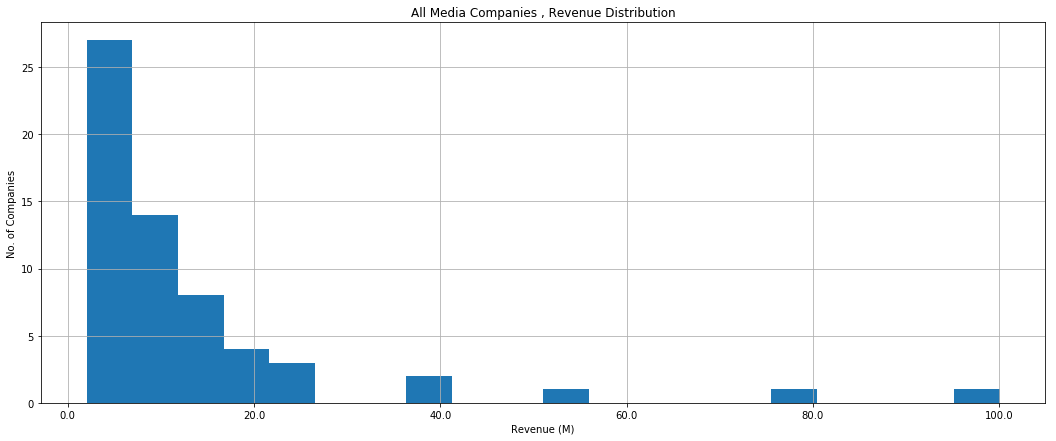

In [21]:
plotter(media,'All Media Companies')

In [22]:
media = media[(media['revenue'] > 999999) & (media['revenue'] < 15000000)]
media['hr-ratio'].describe().astype('int')

count         47
mean      329498
std       263056
min         4525
25%       187212
50%       248076
75%       423407
max      1578000
Name: hr-ratio, dtype: int64

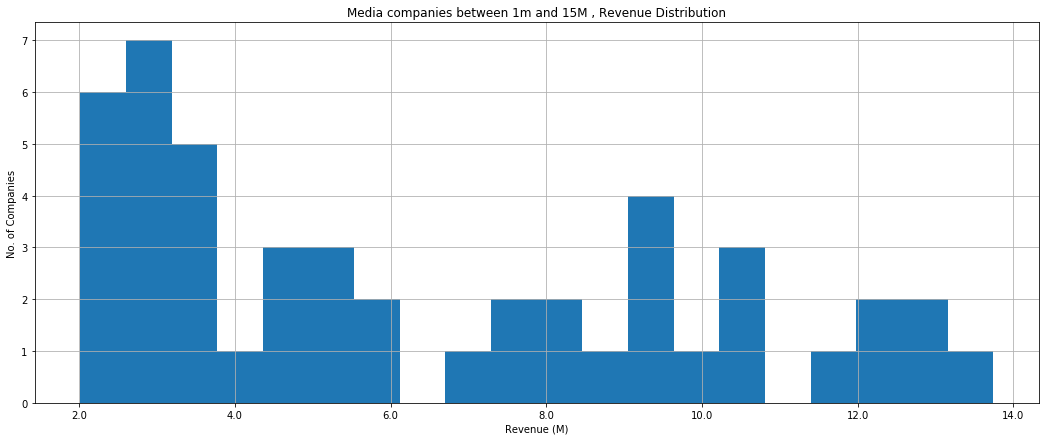

In [23]:
plotter(media,'Media companies between 1m and 15M')

## 47 "Media" companies; HR Ratio = $329,500
#### So media companies have the hgihest HR 

---